# ChE2410 Project 2 


## Paper title: Mathematical modelling and simulation of the thermo-catalytic decomposition of methane for economically improved hydrogen production:
##  List of equations from my paper that will be used in this project:

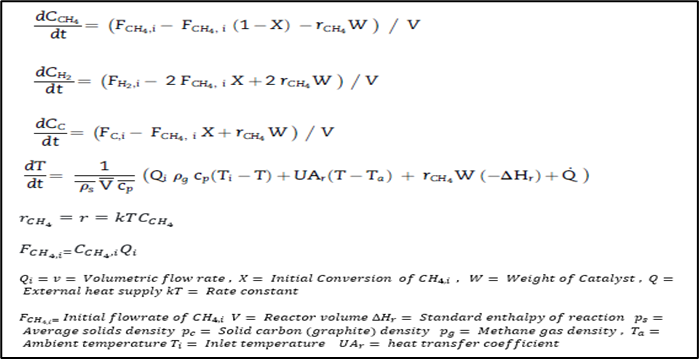

In this analysis I will study the model dynamic behaver with the following parameters: 
Volumetric flow rate ,  X= Initial Conversion  of CH_(4,i )  ,   W= Weight of Catalyst ,  Q= External heat supply and  kT= Rate constant.
While other model parameters will be constants since they are related to standardized values and to the reactor geometry.  


## List of the parameters which will be estimated: 

- kT ,v ,x , W, Q

##  Fitting ODEs! 

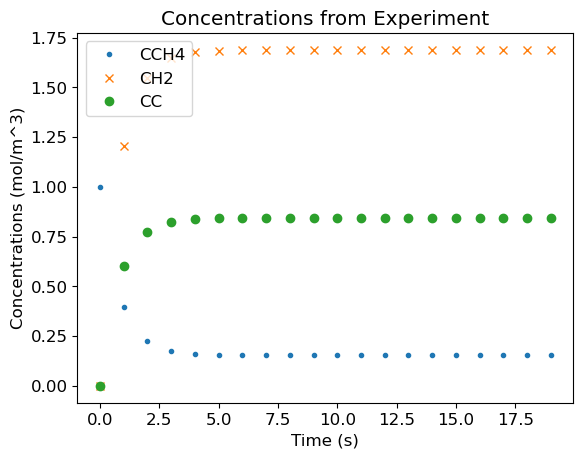

In [150]:
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# values from paper

ps=5088 # kg m^3
cp=2266  # kg m^3
V=4 # m^3
Ti= 300 # K
UAr=3 # W/m^2 K
Ta= 290 # K
dHr= 74800 # J/mol

# Initial Conditions

CCH40=1 # mol/m^3
CH20=0 # mol/m^3
CC0=0 # mol/m^3
T0=1000 # K

ic_4 = [CCH40,CH20,CC0,T0]

time = np.arange(0,20,1) # time will be in second 

# Parameters values from paper

kT=-0.05 # 1/s 
v= 1 # m^3/s
x=0.78 
W=100 # kg
Q=50 # J/s

params1=kT,v,x, W,Q

# writing the ODEs model (list of equations)

def odes_1(vars,time):
    CCH4=vars[0] 
    CH2=vars[1] 
    CC=vars[2]
    T =vars [3]
    
    kT,v,x,W,Q = params1
    
    r=-kT*CCH4
    F_CH40= CCH40*v    
    dCCH4dt=(F_CH40-F_CH40*(1-x)-r*W)/4
    dCH2dt=(-2*F_CH40*x+2*r*W)/4
    dCCdt=(-F_CH40*x+r*W)/4
    dTdt=(1/5088*4*2266)*(v*5088*2266*(300-T)+3*(T-290)+r*W*(-74800)+Q)
    
    return [dCCH4dt,dCH2dt,dCCdt,dTdt]

solution = odeint(odes_1, ic_4, time)

CCH4=solution[:,0]
CH2=solution[:,1]
CC=solution[:,2]
T=solution[:,3]

# ploting the models concentration profiles 

plt.rcParams.update({'font.size': 12})
plt.plot(time,solution[:,0],'.', label='CCH4')
plt.plot(time,solution[:,1],'x', label='CH2')
plt.plot(time,solution[:,2],'o', label='CC')
#plt.plot(time,T,'x', label='T')
plt.xlabel('Time (s)')
plt.ylabel('Concentrations (mol/m^3)')

plt.title('Concentrations from Experiment')

plt.legend();

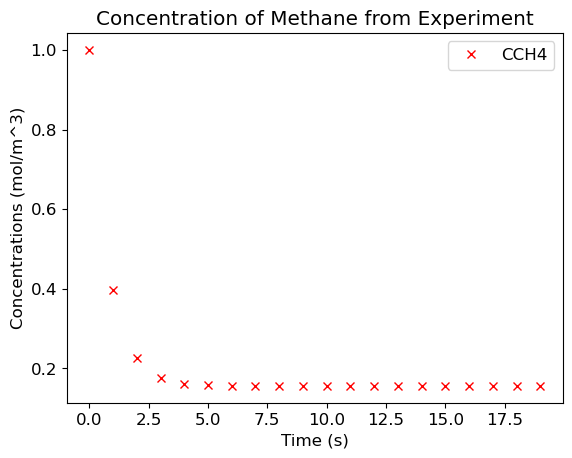

In [151]:
plt.rcParams.update({'font.size': 12})
plt.plot(time,solution[:,0],'rx', label='CCH4')
plt.xlabel('Time (s)')
plt.ylabel('Concentrations (mol/m^3)')

plt.title('Concentration of Methane from Experiment')

plt.legend();

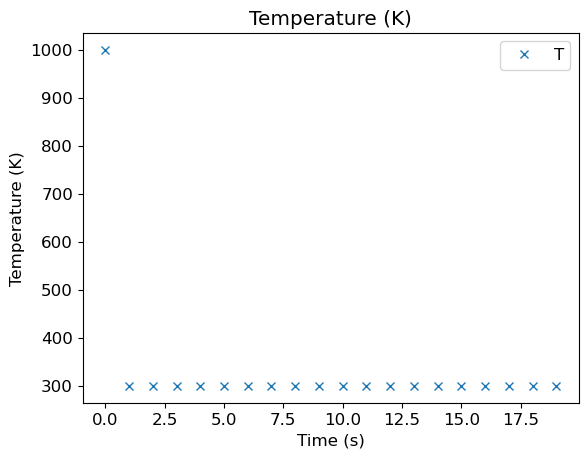

In [152]:

# ploting the temperature  profile

plt.rcParams.update({'font.size': 12})
plt.plot(time,T,'x', label='T')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')

plt.title('Temperature (K)')

plt.legend();

##  In this analysis I will focus only one the Methane (CH4) concentration

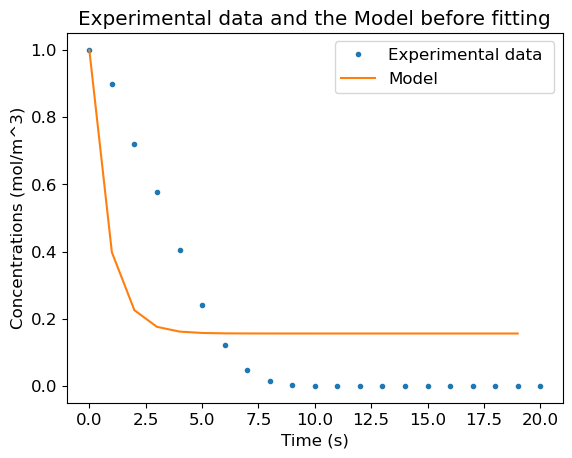

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# importing the experiment data for CH4

file= "Data22.csv"

f= np.genfromtxt(file, delimiter=",", skip_header=1)

t=f[:,0]
CCH4=f[:,1] 
T=f[:,2]

# Ploting the CH4 concentration from experiment data and model from the paper 

plt.rcParams.update({'font.size': 12})
plt.plot(t,f[:,1],'.', label='Experimental data ')
plt.plot(time,solution[:,0], label='Model')
plt.xlabel('Time (s)')
plt.ylabel('Concentrations (mol/m^3)')

 
plt.title('Experimental data and the Model before fitting')

plt.legend();

## Fitting the Model Parameters to experiment 

C:\Users\ahmed\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[-1.10733160e-02  6.49611421e-01  1.00314038e-02  9.86867310e+01
  2.03402742e+07]


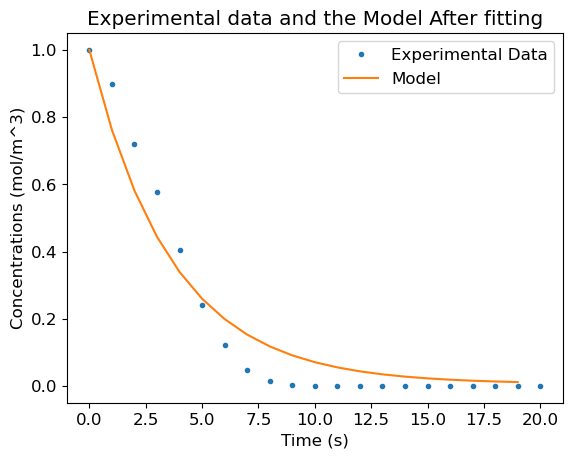

In [154]:
# unising curve_fit to optimize the Parameters
from scipy.optimize import curve_fit

def obj_function(time, kT,v,x,W,Q):
    global params1
    params1 = (kT,v,x,W,Q)
    solution = odeint(odes_1, ic_4, time)   
    model_prediction= solution[:,0]
    return model_prediction 

# parameters guessing 

guesses=[-0.01,1,0.3,90,60]

# parameters optimization 

optimized_params,covariance= curve_fit(obj_function,f[:,0],f[:,1],guesses)

# printing the optimized parameters

print(optimized_params)

# updating parameters after optimization 

kT,v,x, W,Q= optimized_params

solution = odeint(odes_1, ic_4, time)


# Ploting the CH4 concentration from experiment data and model from the paper 

plt.rcParams.update({'font.size': 12})
plt.plot(t,f[:,1],'.', label='Experimental Data')
plt.plot(time,solution[:,0], label='Model')
plt.xlabel('Time (s)')
plt.ylabel('Concentrations (mol/m^3)')

plt.title('Experimental data and the Model After fitting')

plt.legend();

# Bifurcation Analysis

## Performing bifurcation analysis for Q parameter:

Text(0.5, 1.0, 'Bifurcation analysis for steady state changes with Q')

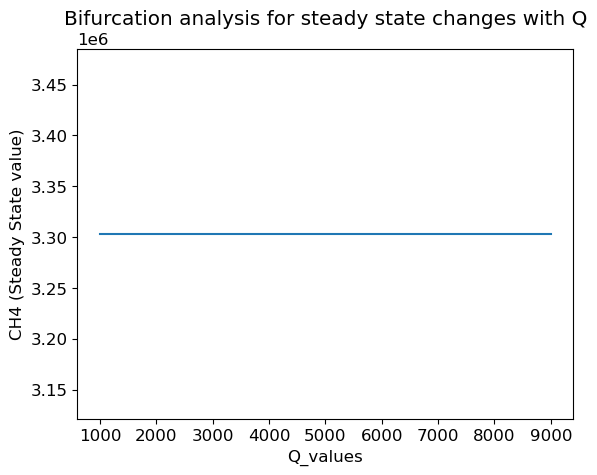

In [155]:
# values of optimized Paramterts 

kT=-1.10733160e-02
v= 6.49611421e-01
x= 1.00314038e-02 
W= 9.86867310e+01
Q= 2.03402742e+07

Q_values=np.arange(1000,10000,2000)
#params2 = v,x, W,Q
def Bifurcation_func(Q,params2):
    
    kT,v, x,W= params2
    
    CCH4= ic_4[0]
    CH2= ic_4[1]
    CC= ic_4[2]
    T= ic_4[3]
    
    r=-kT*CCH4
    F_CH40= CCH40*v    
    dCCH4dt=(F_CH40-F_CH40*(1-x)-r*W)/4
    dCH2dt=(-2*F_CH40*x+2*r*W)/4
    dCCdt=(-F_CH40*x+r*W)/4
    dTdt=(1/5088*4*2266)*(v*5088*2266*(300-T)+3*(T-290)+r*W*(-74800)+Q)
    
    return dCCH4dt

optimized_params=[kT,v,x,W]

dCCH4dt_values=[Bifurcation_func (Q,params2) for Q in Q_values]
# W_values,dCCH4dt_values
plt.plot(Q_values,dCCH4dt_values)

plt.xlabel('Q_values')
plt.ylabel('CH4 (Steady State value)')

plt.title('Bifurcation analysis for steady state changes with Q')

#plt.legend();

## Performing bifurcation analysis for kT parameter:

Text(0, 0.5, 'dCCH4dt_values')

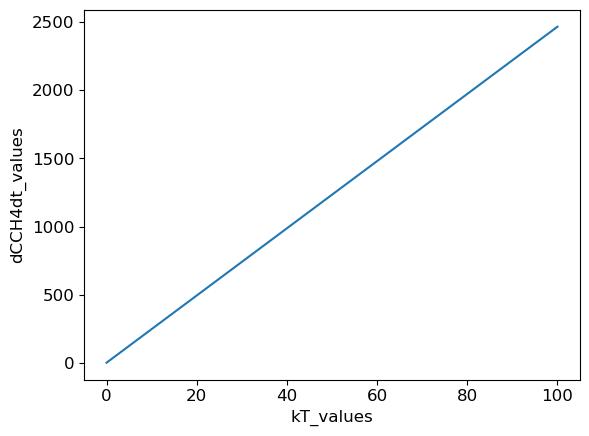

In [156]:
# values of optimized Paramterts 

kT=-1.10733160e-02
v= 6.49611421e-01
x= 1.00314038e-02 
W= 9.86867310e+01
Q= 2.03402742e+07

# kT values range 

kT_values=np.arange(-1e-6,100,10)

params2 = v,x, W,Q

def Bifurcation_func(kT,params2):
    
    v,x, W,Q= params2
    CCH4= ic_4[0]
    CH2= ic_4[1]
    CC= ic_4[2]
    T= ic_4[3]
    r=-kT*CCH4
    F_CH40= CCH40*v    
    dCCH4dt=(F_CH40-F_CH40*(1-x)-r*W)/4
    dCH2dt=(-2*F_CH40*x+2*r*W)/4
    dCCdt=(-F_CH40*x+r*W)/4
    dTdt=(1/5088*4*2266)*(v*5088*2266*(300-T)+3*(T-290)+r*W*(-74800)+Q)
    
    return dCCH4dt

optimized_params=[v,x, W,Q]

dCCH4dt_values=[Bifurcation_func (kT,params2) for kT in kT_values]

# Ploting the kT_values and dCCH4dt_values

plt.plot(kT_values,dCCH4dt_values)

plt.xlabel('kT_values')
plt.ylabel('dCCH4dt_values')

## Performing bifurcation analysis for v parameter:

Text(0, 0.5, 'dCCH4dt_values')

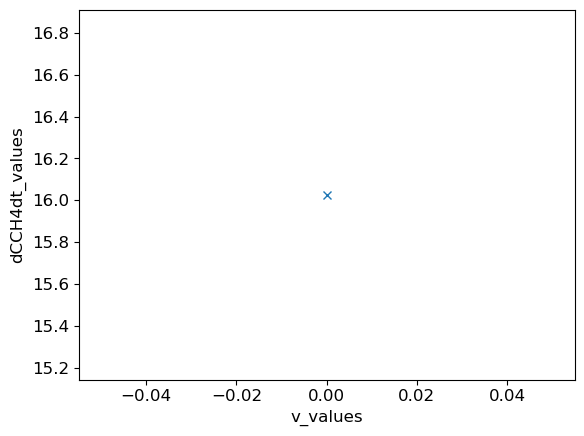

In [157]:
# v values range 

v_values=np.arange(-0,100,1000)

def Bifurcation_func(v,params2):
    
    kT,x, W,Q= params2
    
    CCH4= ic_4[0]
    CH2= ic_4[1]
    CC= ic_4[2]
    T= ic_4[3]
    
    r=-kT*CCH4
    F_CH40= CCH40*v    
    dCCH4dt=(F_CH40-F_CH40*(1-x)-r*W)/4
    dCH2dt=(-2*F_CH40*x+2*r*W)/4
    dCCdt=(-F_CH40*x+r*W)/4
    dTdt=(1/5088*4*2266)*(v*5088*2266*(300-T)+3*(T-290)+r*W*(-74800)+Q)
    
    return dCCH4dt

optimized_params=[kT,x, W,Q]

dCCH4dt_values=[Bifurcation_func (v,params2) for v in v_values]

# Ploting the v_values and dCCH4dt_values

plt.plot(v_values,dCCH4dt_values,'x')

plt.xlabel('v_values')
plt.ylabel('dCCH4dt_values')

## Performing bifurcation analysis for x parameter:

Text(0, 0.5, 'dCCH4dt_values')

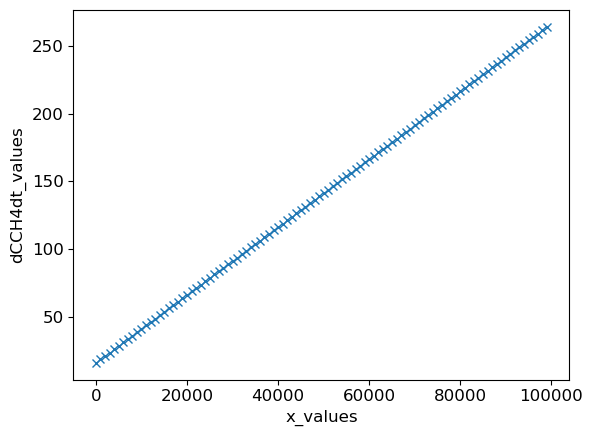

In [158]:
# x values range 
x_values=np.arange(0,100000,1000)

def Bifurcation_func(x,params2):
    
    kT,v, W,Q= params2
    
    CCH4= ic_4[0]
    CH2= ic_4[1]
    CC= ic_4[2]
    T= ic_4[3]
    
    r=-kT*CCH4
    F_CH40= CCH40*v    
    dCCH4dt=(F_CH40-F_CH40*(1-x)-r*W)/4
    dCH2dt=(-2*F_CH40*x+2*r*W)/4
    dCCdt=(-F_CH40*x+r*W)/4
    dTdt=(1/5088*4*2266)*(v*5088*2266*(300-T)+3*(T-290)+r*W*(-74800)+Q)
    
    return dCCH4dt

optimized_params=[kT,v, W,Q]

dCCH4dt_values=[Bifurcation_func (x,params2) for x in x_values]
# Ploting x_values and dCCH4dt_values
plt.plot(x_values,dCCH4dt_values,'x')

plt.xlabel('x_values')
plt.ylabel('dCCH4dt_values')

# Sensitivity Analysis: 

## Local parametric sensitivity:

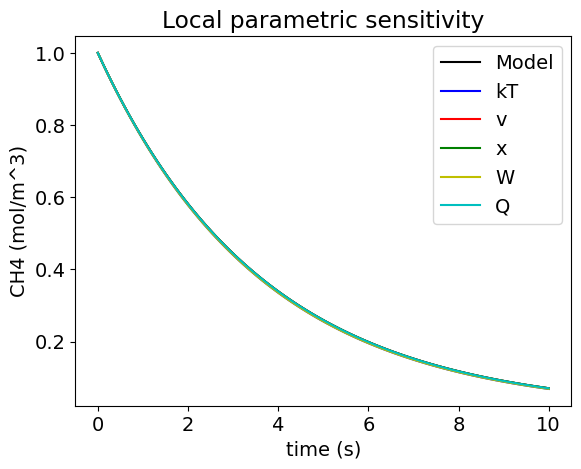

In [159]:
# 1 %
def Sensitivity_1(vars,time,kT,v,x, W,Q):
    CCH4=vars[0] 
    CH2=vars[1] 
    CC=vars[2]
    T =vars [3]
    
    r=-kT*CCH4
    F_CH40= CCH40*v    
    dCCH4dt=(F_CH40-F_CH40*(1-x)-r*W)/4
    dCH2dt=(-2*F_CH40*x+2*r*W)/4
    dCCdt=(-F_CH40*x+r*W)/4
    dTdt=(1/5088*4*2266)*(v*5088*2266*(300-T)+3*(T-290)+r*W*(-74800)+Q)
    
    return [dCCH4dt,dCH2dt,dCCdt,dTdt]

timesteps = np.linspace(0,10,100)

y = odeint(Sensitivity_1, ic_4 , timesteps, args = (-1.10733160e-02,6.49611421e-01,1.00314038e-02,9.86867310e+01,2.03402742e+07))
y1 = odeint(Sensitivity_1, ic_4 , timesteps, args = (-1.10733160e-02*1.01,6.49611421e-01,1.00314038e-02,9.86867310e+01,2.03402742e+07))
y2 = odeint(Sensitivity_1, ic_4 , timesteps, args = (-1.10733160e-02,6.49611421e-01*1.01,1.00314038e-02,9.86867310e+01,2.03402742e+07))
y3 = odeint(Sensitivity_1, ic_4 , timesteps, args = (-1.10733160e-02,6.49611421e-01,1.00314038e-02*1.01,9.86867310e+01,2.03402742e+07))
y4 = odeint(Sensitivity_1, ic_4 , timesteps, args = (-1.10733160e-02,6.49611421e-01,1.00314038e-02,9.86867310e+01*1.01,2.03402742e+07))
y5 = odeint(Sensitivity_1, ic_4 , timesteps, args = (-1.10733160e-02,6.49611421e-01,1.00314038e-02,9.86867310e+01,2.03402742e+07*1.01))


# Plot the numerical solution

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time (s)")
plt.ylabel("CH4 (mol/m^3)")
plt.plot(timesteps, y[:,0],'k', label = "Model");
plt.plot(timesteps, y1[:,0],'b', label = "kT");
plt.plot(timesteps, y2[:,0],'r', label = "v");
plt.plot(timesteps, y3[:,0],'g', label = "x");
plt.plot(timesteps, y4[:,0],'y', label = "W");
plt.plot(timesteps, y5[:,0],'c', label = "Q");

plt.title('Local parametric sensitivity')

plt.legend()


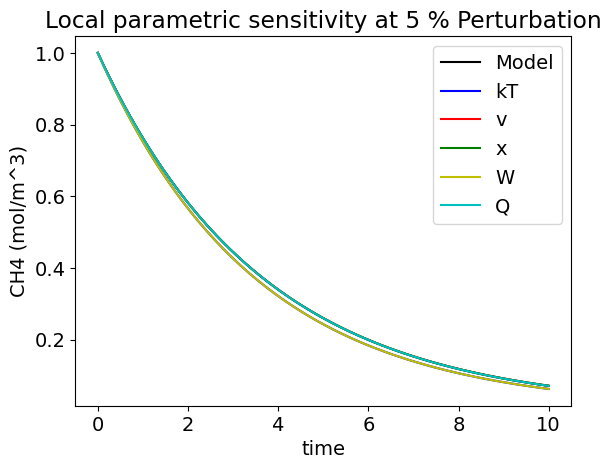

In [160]:
# 5 %
y = odeint(Sensitivity_1, ic_4 , timesteps, args = (-1.10733160e-02,6.49611421e-01,1.00314038e-02,9.86867310e+01,2.03402742e+07))
y1 = odeint(Sensitivity_1, ic_4 , timesteps, args = (-1.10733160e-02*1.05,6.49611421e-01,1.00314038e-02,9.86867310e+01,2.03402742e+07))
y2 = odeint(Sensitivity_1, ic_4 , timesteps, args = (-1.10733160e-02,6.49611421e-01*1.05,1.00314038e-02,9.86867310e+01,2.03402742e+07))
y3 = odeint(Sensitivity_1, ic_4 , timesteps, args = (-1.10733160e-02,6.49611421e-01,1.00314038e-02*1.05,9.86867310e+01,2.03402742e+07))
y4 = odeint(Sensitivity_1, ic_4 , timesteps, args = (-1.10733160e-02,6.49611421e-01,1.00314038e-02,9.86867310e+01*1.05,2.03402742e+07))
y5 = odeint(Sensitivity_1, ic_4 , timesteps, args = (-1.10733160e-02,6.49611421e-01,1.00314038e-02,9.86867310e+01,2.03402742e+07*1.05))


# Plot the numerical solution

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("CH4 (mol/m^3)")
plt.plot(timesteps, y[:,0],'k', label = "Model");
plt.plot(timesteps, y1[:,0],'b', label = "kT");
plt.plot(timesteps, y2[:,0],'r', label = "v");
plt.plot(timesteps, y3[:,0],'g', label = "x");
plt.plot(timesteps, y4[:,0],'y', label = "W");
plt.plot(timesteps, y5[:,0],'c', label = "Q");

plt.title('Local parametric sensitivity at 5 % Perturbation')

plt.legend()

## Local initial condition sensitivity

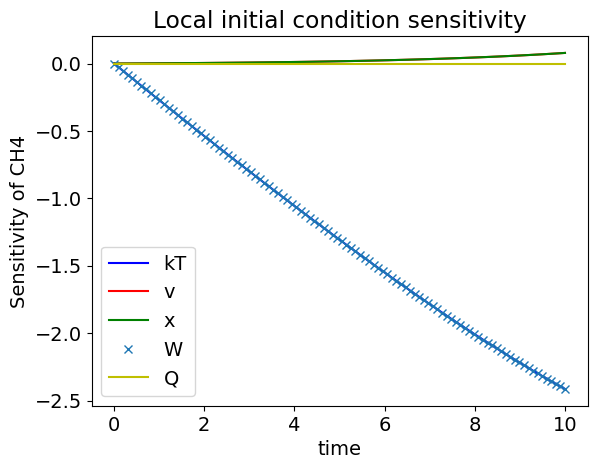

In [161]:
# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("time")
plt.ylabel("Sensitivity of CH4")
plt.plot(timesteps, ((y1[:,0] - y[:,0])/y[:,0])/0.05,'b', label = "kT");
plt.plot(timesteps, ((y2[:,0] - y[:,0])/y[:,0])/0.05,'r', label = "v");
plt.plot(timesteps,((y3[:,0] - y[:,0])/y[:,0])/0.05,'g', label = "x");
plt.plot(timesteps,((y4[:,0] - y[:,0])/y[:,0])/0.05,'x', label = "W");
plt.plot(timesteps,((y5[:,0] - y[:,0])/y[:,0])/0.05,'y', label = "Q");

plt.title('Local initial condition sensitivity')

plt.legend()
#plt.legend()

## Global sensitivity analysis:

### Global sensitivity step 1:  generate data

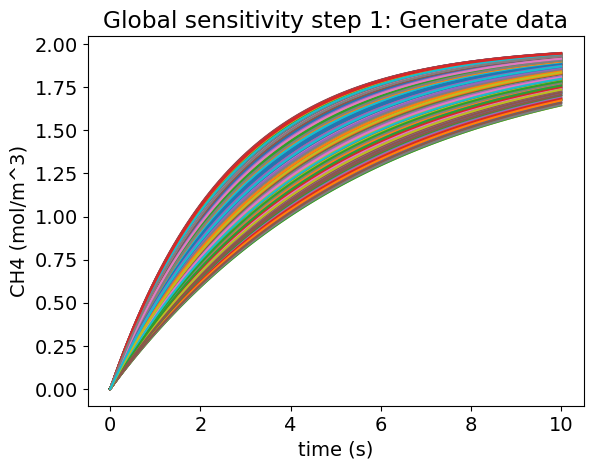

In [162]:
# values of optimized Paramterts 

kT=-1.10733160e-02
v= 6.49611421e-01
x= 1.00314038e-02 
W= 9.86867310e+01
Q= 2.03402742e+07

# generate several output for random selections of parameters
N = 1000;
kT = np.random.uniform(-1.10733160e-02*.8,-1.10733160e-02*1.2,N);
v = np.random.uniform(6.49611421e-01*.8,6.49611421e-01*1.2,N);
x = np.random.uniform(1.00314038e-02*.8,1.00314038e-02*1.2,N);
W = np.random.uniform(9.86867310e+01*.8,9.86867310e+01*1.2,N);
Q = np.random.uniform(2.03402742e+07*.8,2.03402742e+07*1.2,N);

CCH4 = np.zeros(N);

for m in np.arange(0,N,1): 
    output = odeint(Sensitivity_1, ic_4 , timesteps, args =(kT[m],v[m],x[m],W[m],Q[m]));
    plt.plot(timesteps,output[:,1]);
    plt.xlabel("time (s)");
    plt.ylabel("CH4 (mol/m^3)");
    CCH4[m]=output[-1,1];

    plt.title('Global sensitivity step 1: Generate data')


 ### Global Sensitivity Analysis Step 2: visualize your parameter space

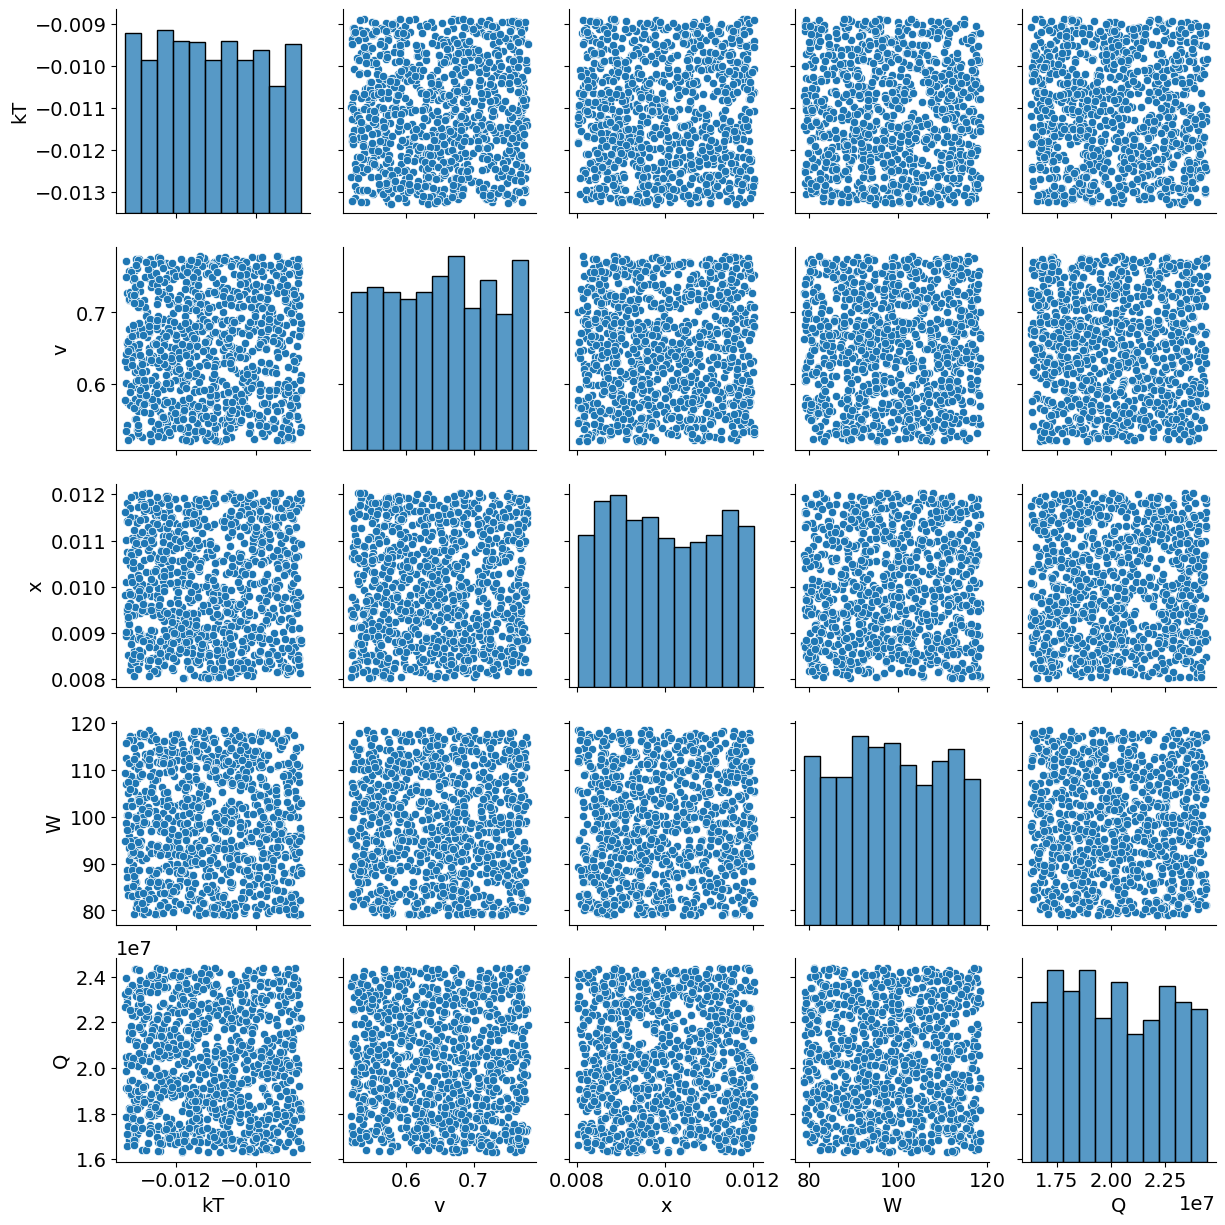

In [163]:
# Plot histograms of sampled parameter space

import pandas as pd
import seaborn as sns

tmp = {'kT':kT, 'v':v, 'x':x, 'W':W, 'Q':Q};
df = pd.DataFrame(tmp);
del(tmp)

sns.pairplot(df)
20
plt.show()

## Global Sensitivity Analysis Step 3: Use least squares to estimate the normalized sensitivities

Our fitted equn is y =  -2.067726726089815 kT +  -0.025838562661136072 v + 2.0041024271117744 x+ 0.003839933885059363 W + -1.928424686475045e-09 Q


Text(0.5, 1.0, 'Global sensitivity step 3: Generate data')

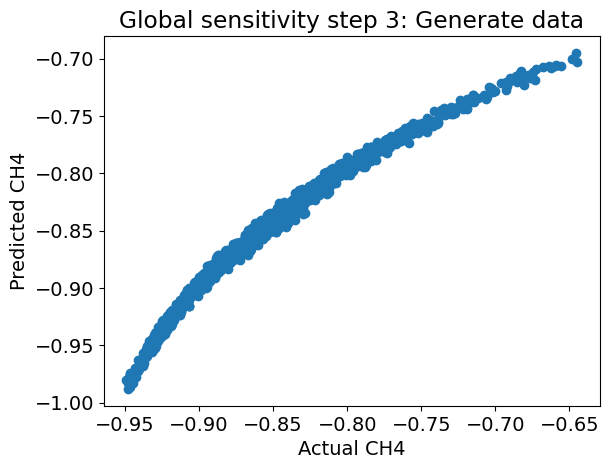

In [164]:
# Normalize y
y = (1-CCH4)/1; # See first set of code to find this number


# Build our X. Normalize values
X = np.c_[(0.06-kT)/0.06,(1-v),(1-x),(1-W)/1,(10-Q)/10]

# Now can just do the linear least squares estimate
#===================================================

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ y;
print("Our fitted equn is y = ",params[0], "kT + ", params[1], "v +", params[2],"x+",params[3],"W +",params[4],"Q" )

plt.plot(y,X @ params,"o");
plt.ylabel("Predicted CH4");
plt.xlabel("Actual CH4");

plt.title('Global sensitivity step 3: Generate data')